## Twitter API - network graph and sentiment analysis

In [3]:
import tweepy
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import json

pd.set_option('display.max_columns', None)

In [4]:
consumer_key = 'put_your_consumer_key'
consumer_secret = 'put_your_consumer_secret'
access_token = 'put_your_access_token_key'
access_token_secret = 'put_your_access_token_secret'

authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_token_secret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

try:
    api.verify_credentials()
    print('Successful authentication')
except:
    print("Error during authentication")

Successful authentication


Searching by word(hashtag).

In [5]:
query = 'ukraine'

tweets = tweepy.Cursor(api.search, q='ukraine', lang="en").items(100)

df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])
df.head()

,Tweets
0,RT @wallacemick: Invasion of Ukraine was preci...
1,"RT @RadioGenova: ""If there is a Russian invasi..."
2,RT @TimRunsHisMouth: NOT A PENNY MORE FOR UKRA...
3,Ukraine is able to keep fighting today because...
4,@RepGosar When you're handlers Master leaves t...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
query = 'bitcoin'

tweets = api.search(query, lang='en', tweet_mode='extended', result_type='recent')
df = pd.json_normalize([tweet._json for tweet in tweets])
df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.utc_offset,user.time_zone,user.geo_enabled,user.verified,user.statuses_count,user.lang,user.contributors_enabled,user.is_translator,user.is_translation_enabled,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_image_url,user.profile_image_url_https,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,retweeted_status.created_at,retweeted_status.id,retweeted_status.id_str,retweeted_status.full_text,retweeted_status.truncated,retweeted_status.display_text_range,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.user_mentions,retweeted_status.entities.urls,retweeted_status.metadata.iso_language_code,retweeted_status.metadata.result_type,retweeted_status.source,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.user.id,retweeted_status.user.id_str,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.location,retweeted_status.user.description,retweeted_status.user.url,retweeted_status.user.entities.url.urls,retweeted_status.user.entities.description.urls,retweeted_status.user.protected,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.created_at,retweeted_status.user.favourites_count,retweeted_status.user.utc_offset,retweeted_status.user.time_zone,retweeted_status.user.geo_enabled,retweeted_status.user.verified,retweeted_status.user.statuses_count,retweeted_status.user.lang,retweeted_status.user.contributors_enabled,retweeted_status.user.is_translator,retweeted_status.user.is_translation_enabled,retweeted_status.user.profile_background_color,retweeted_status.user.profile_background_image_url,retweeted_status.user.profile_background_image_url_https,retweeted_status.user.profile_background_tile,retweeted_status.user.profile_image_url,retweeted_status.user.profile_image_url_https,retweeted_status.user.profile_banner_url,retweeted_status.user.profile_link_color,retweeted_status.user.profile_sidebar_border_color,retweeted_status.user.profile_sidebar_fill_color,retweeted_status.user.profile_text_color,retweeted_status.user.profile_use_background_image,retweeted_status.user.has_extended_profile,retweeted_status.user.default_profile,retweeted_status.user.default_profile_image,retweeted_status.user.following,retweeted_status.user.follow_request_sent,retweeted_status.user.notifications,retweeted_status.user.translator_type,retweeted_status.user.withheld_in_countries,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.is_quote_status,retweeted_status.retweet_count,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.lang,user.profile_banner_url,retweeted_status.entities.media,retweeted_status.extended_entities.media

In [ ]:
query = 'bitcoin'

tweets = tweepy.Cursor(api.search, q=query, lang="en").items(100)

tweets_list = [tweet._json for tweet in tweets]
df = pd.json_normalize(tweets_list)
df.head(3)

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,metadata.iso_language_code,metadata.result_type,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.utc_offset,user.time_zone,user.geo_enabled,user.verified,user.statuses_count,user.lang,user.contributors_enabled,user.is_translator,user.is_translation_enabled,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_image_url,user.profile_image_url_https,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,retweeted_status.created_at,retweeted_status.id,retweeted_status.id_str,retweeted_status.text,retweeted_status.truncated,retweeted_status.entities.hashtags,retweeted_status.entities.symbols,retweeted_status.entities.user_mentions,retweeted_status.entities.urls,retweeted_status.metadata.iso_language_code,retweeted_status.metadata.result_type,retweeted_status.source,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.user.id,retweeted_status.user.id_str,retweeted_status.user.name,retweeted_status.user.screen_name,retweeted_status.user.location,retweeted_status.user.description,retweeted_status.user.url,retweeted_status.user.entities.url.urls,retweeted_status.user.entities.description.urls,retweeted_status.user.protected,retweeted_status.user.followers_count,retweeted_status.user.friends_count,retweeted_status.user.listed_count,retweeted_status.user.created_at,retweeted_status.user.favourites_count,retweeted_status.user.utc_offset,retweeted_status.user.time_zone,retweeted_status.user.geo_enabled,retweeted_status.user.verified,retweeted_status.user.statuses_count,retweeted_status.user.lang,retweeted_status.user.contributors_enabled,retweeted_status.user.is_translator,retweeted_status.user.is_translation_enabled,retweeted_status.user.profile_background_color,retweeted_status.user.profile_background_image_url,retweeted_status.user.profile_background_image_url_https,retweeted_status.user.profile_background_tile,retweeted_status.user.profile_image_url,retweeted_status.user.profile_image_url_https,retweeted_status.user.profile_banner_url,retweeted_status.user.profile_link_color,retweeted_status.user.profile_sidebar_border_color,retweeted_status.user.profile_sidebar_fill_color,retweeted_status.user.profile_text_color,retweeted_status.user.profile_use_background_image,retweeted_status.user.has_extended_profile,retweeted_status.user.default_profile,retweeted_status.user.default_profile_image,retweeted_status.user.following,retweeted_status.user.follow_request_sent,retweeted_status.user.notifications,retweeted_status.user.translator_type,retweeted_status.user.withheld_in_countries,retweeted_status.geo,retweeted_status.coordinates,retweeted_status.place,retweeted_status.contributors,retweeted_status.is_quote_status,retweeted_status.retweet_count,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.retweeted,retweeted_status.lang,user.profile_banner_url,retweeted_status.possibly_sensitive,possibly_sensitive,entities.media,extended_entities.media,user.entities.url.urls,retweeted_status.ent

In [ ]:
df['retweeted_status.user.location'].value_counts()

                             240
Bitcoin 🚀🌙                    62
Dubai, UAE                    15
Nashville, TN                 13
🇦🇺                             9
                            ... 
Frontend & Web3 developer      1
Springfield, IL                1
openseas                       1
London, England                1
Universe                       1
Name: retweeted_status.user.location, Length: 117, dtype: int64

In [ ]:
[name for name in df.columns if re.findall(r'\S+.hashtags', name) != []]

['entities.hashtags',
 'retweeted_status.entities.hashtags',
 'retweeted_status.quoted_status.entities.hashtags',
 'quoted_status.entities.hashtags']

In [ ]:
df[['user.screen_name', 'retweeted_status.user.screen_name', 'quoted_status.user.screen_name']].head(5)

,user.screen_name,retweeted_status.user.screen_name,quoted_status.user.screen_name
0,BahzadA31081615,rovercrc,NaN
1,SolvoFinance,NaN,NaN
2,Vanny257a,Jayecane,NaN
3,CleanUpBitcoin,AlexFormuzis,NaN
4,ashish_sahdev9,MartiniGuyYT,NaN


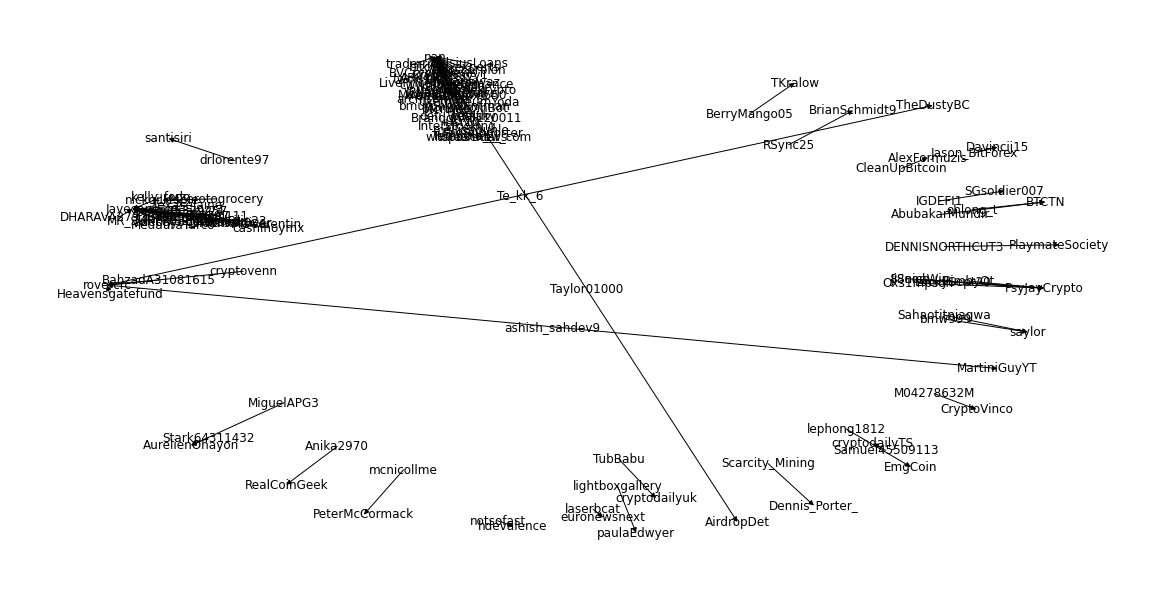

In [ ]:
G = nx.from_pandas_edgelist(
    df,
    source='user.screen_name',
    target='retweeted_status.user.screen_name',
    create_using=nx.DiGraph()
)

plt.figure(figsize=(16, 8))
nx.draw(G, with_labels=True, node_size=0.0001)
plt.show()

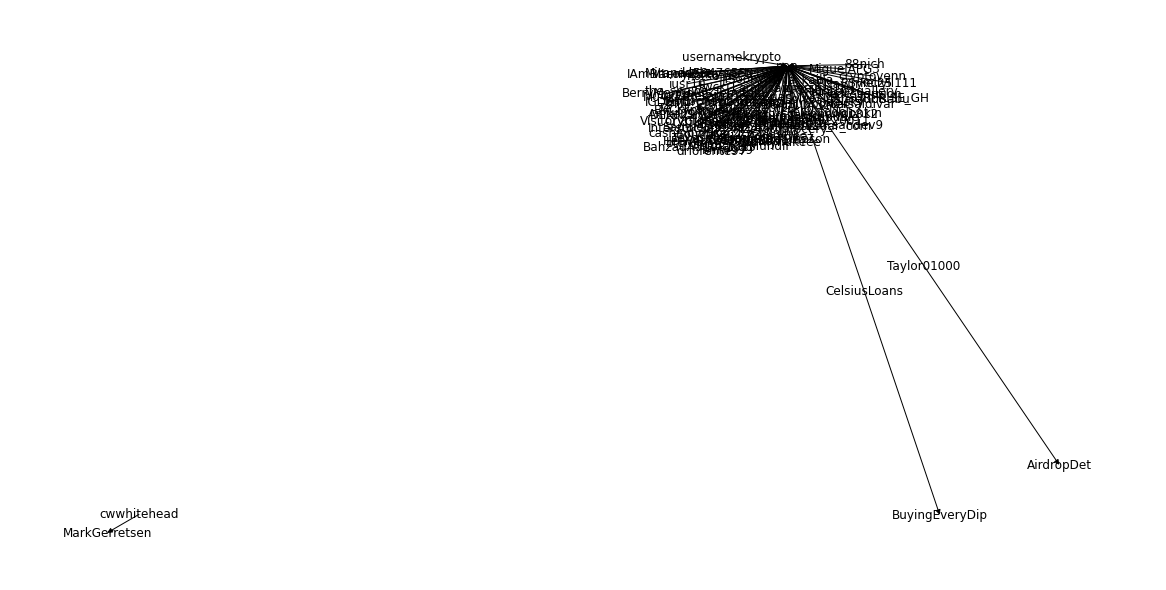

In [ ]:
G = nx.from_pandas_edgelist(
    df,
    source='user.screen_name',
    target='quoted_status.user.screen_name',
    create_using=nx.DiGraph()
)

plt.figure(figsize=(16, 8))
nx.draw(G, with_labels=True, node_size=0.0001)
plt.show()

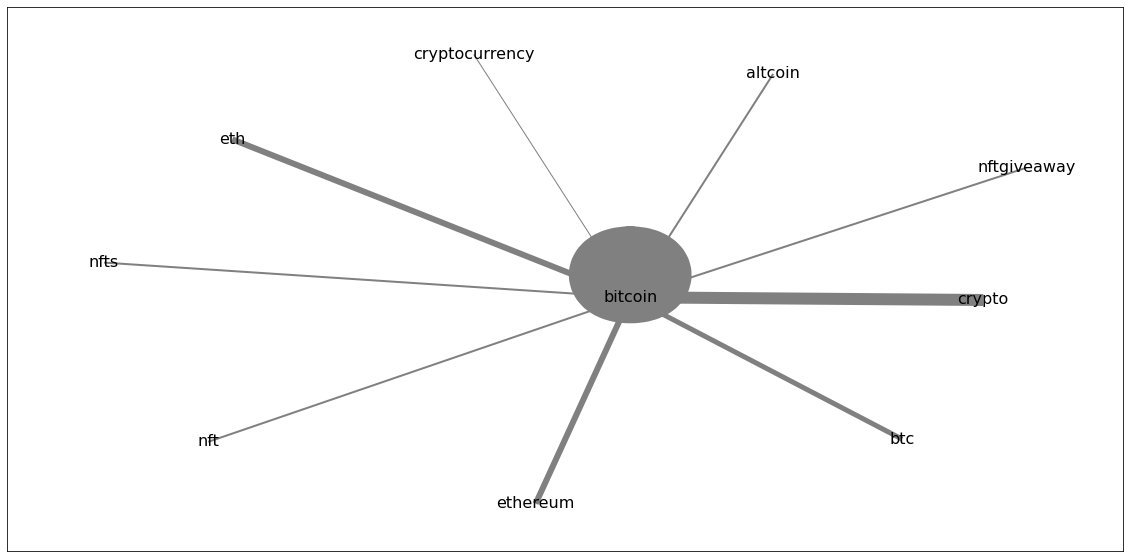

In [ ]:
df['hashtags_list'] = df['entities.hashtags'].apply(lambda x: [i['text'].lower() for i in x])
list_of_hashtags = [element for sublist in df['hashtags_list'].to_list() for element in sublist]
frequencies_of_topics = Counter(map(str.lower, list_of_hashtags)).most_common(10)

G = nx.DiGraph()
for topic, weight in frequencies_of_topics:
    G.add_edge(query, topic, weight=weight)

plt.figure(figsize=(20, 10))
nx.draw_networkx(G, width=[d['weight'] for _, _, d in G.edges(data=True)], arrows=False, 
                 node_size=0.0001, edge_color='grey', font_size= 16)
plt.show()

Searching tweets by user name.

In [ ]:
nickname = 'nexta_tv'
tweets = api.user_timeline(screen_name = nickname, count = 100, 
                           lang = 'en', tweet_mode = 'extended')


print(tweets[0].full_text)

❗️Photos of mass graves from the liberated #Izium were published

Some of the graves have crosses, with inscriptions on them: "AFU, 17 people, from the morgue", "345", "412". Commissioner for Missing Persons Oleg Kotenko confirmed the authenticity of this photos.

📰Current Time https://t.co/MxpBU1jvNY


In [ ]:
tweets_list = [tweet._json for tweet in tweets]
df = pd.json_normalize(tweets_list)
df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,entities.hashtags,entities.symbols,entities.user_mentions,entities.urls,entities.media,extended_entities.media,user.id,user.id_str,user.name,user.screen_name,user.location,user.description,user.url,user.entities.url.urls,user.entities.description.urls,user.protected,user.followers_count,user.friends_count,user.listed_count,user.created_at,user.favourites_count,user.utc_offset,user.time_zone,user.geo_enabled,user.verified,user.statuses_count,user.lang,user.contributors_enabled,user.is_translator,user.is_translation_enabled,user.profile_background_color,user.profile_background_image_url,user.profile_background_image_url_https,user.profile_background_tile,user.profile_image_url,user.profile_image_url_https,user.profile_banner_url,user.profile_link_color,user.profile_sidebar_border_color,user.profile_sidebar_fill_color,user.profile_text_color,user.profile_use_background_image,user.has_extended_profile,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,quoted_status_id,quoted_status_id_str,quoted_status_permalink.url,quoted_status_permalink.expanded,quoted_status_permalink.display,quoted_status.created_at,quoted_status.id,quoted_status.id_str,quoted_status.full_text,quoted_status.truncated,quoted_status.display_text_range,quoted_status.entities.hashtags,quoted_status.entities.symbols,quoted_status.entities.user_mentions,quoted_status.entities.urls,quoted_status.source,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.in_reply_to_screen_name,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.name,quoted_status.user.screen_name,quoted_status.user.location,quoted_status.user.description,quoted_status.user.url,quoted_status.user.entities.description.urls,quoted_status.user.protected,quoted_status.user.followers_count,quoted_status.user.friends_count,quoted_status.user.listed_count,quoted_status.user.created_at,quoted_status.user.favourites_count,quoted_status.user.utc_offset,quoted_status.user.time_zone,quoted_status.user.geo_enabled,quoted_status.user.verified,quoted_status.user.statuses_count,quoted_status.user.lang,quoted_status.user.contributors_enabled,quoted_status.user.is_translator,quoted_status.user.is_translation_enabled,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.has_extended_profile,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.following,quoted_status.user.follow_request_sent,quoted_status.user.notifications,quoted_status.user.translator_type,quoted_status.user.withheld_in_countries,quoted_status.geo,quoted_status.coordinates,quoted_status.place,quoted_status.contributors,quoted_status.is_quote_status,quoted_status.retweet_count,quoted_status.favorite_count,quoted_status.favorited,quoted_status.retweeted,quoted_status.lang,quoted_status.entities.media,quoted_status.extended_entities.media,quoted_status.user.entities.url.urls,quoted_status.user.profile_banner_url,quoted_status.possibly_sensitive
0,Thu Sep 15 18:00:43 +0000 2022,1570472696722427911,1570472696722427911,❗️Photos of mass graves fro

In [ ]:
print(list(df.columns))

['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang', 'entities.hashtags', 'entities.symbols', 'entities.user_mentions', 'entities.urls', 'entities.media', 'extended_entities.media', 'user.id', 'user.id_str', 'user.name', 'user.screen_name', 'user.location', 'user.description', 'user.url', 'user.entities.url.urls', 'user.entities.description.urls', 'user.protected', 'user.followers_count', 'user.friends_count', 'user.listed_count', 'user.created_at', 'user.favourites_count', 'user.utc_offset', 'user.time_zone', 'user.geo_enabled', 'user.verified', 'user.statuses_count', 'user.lang', 'user.contributors_enabled', 'user.is_translator', 'user.is_translation_enabled', 'user

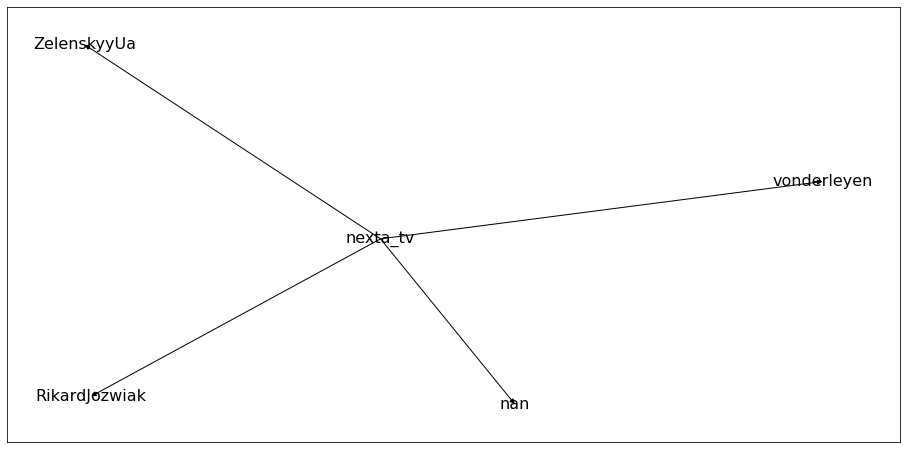

In [ ]:
G = nx.from_pandas_edgelist(
    df,
    source='user.screen_name',
    target='quoted_status.user.screen_name', # retweeted_status.user.screen_name, quoted_status.user.screen_name
    create_using=nx.DiGraph()
)

plt.figure(figsize=(16, 8))
nx.draw_networkx(G, with_labels=True, node_size=0.0001, font_size=16)
plt.show()

In [ ]:
df['user_mentions'] = df['entities.user_mentions'].apply(lambda x: [i['screen_name'] for i in x])
df['hashtags_list'] = df['entities.hashtags'].apply(lambda x: [i['text'] for i in x])

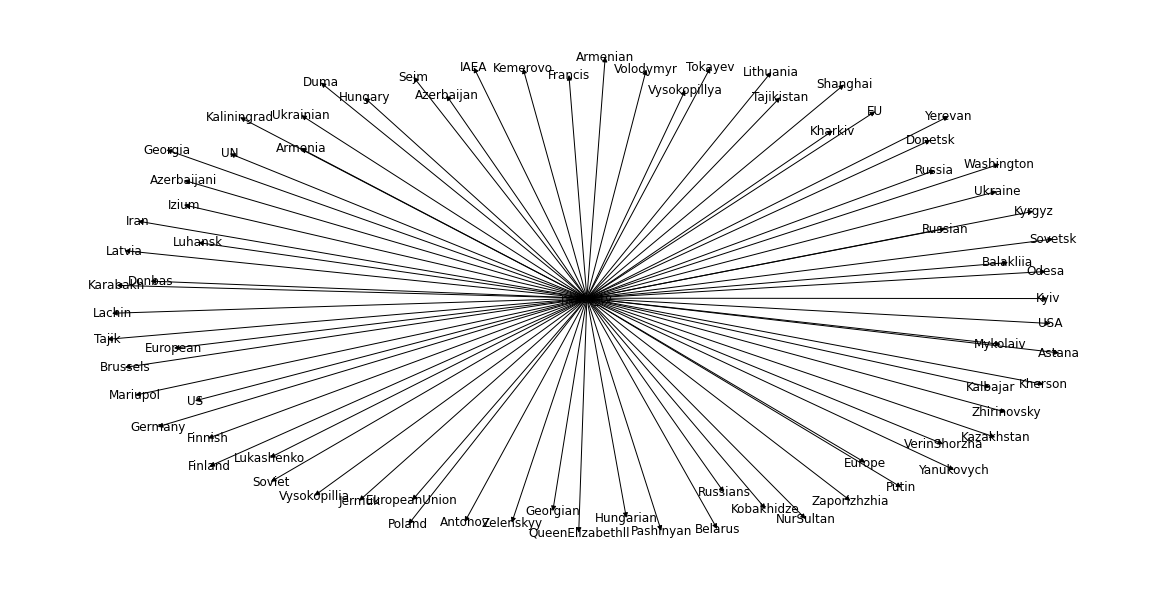

In [ ]:
G = nx.DiGraph()
for tweet in df.iterrows():
    for topic in tweet[1]['hashtags_list']:
        G.add_edge(tweet[1]['user.screen_name'], topic)

plt.figure(figsize=(16, 8))
nx.draw(G, with_labels=True, node_size=0.0001)
plt.show()

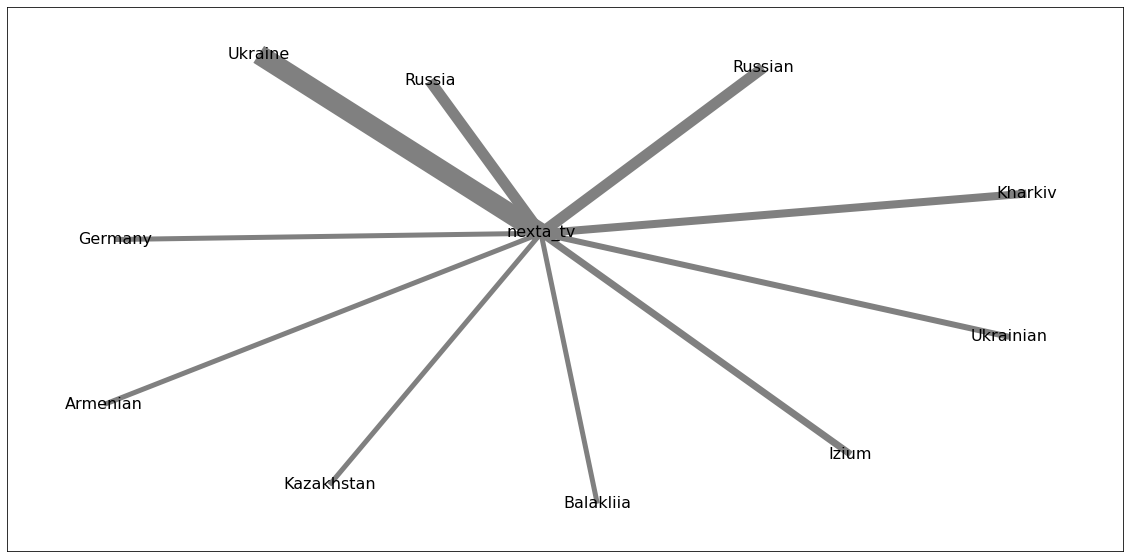

In [ ]:
list_of_hashtags = [element for sublist in df['hashtags_list'].to_list() for element in sublist]
frequencies_of_topics = Counter(list_of_hashtags).most_common(10)

G = nx.DiGraph()
for topic, weight in frequencies_of_topics:
  G.add_edge(nickname, topic, weight=weight)

plt.figure(figsize=(20, 10))
nx.draw_networkx(G, width=[d['weight'] for _, _, d in G.edges(data=True)], arrows=False, 
                 node_size=0.0001, edge_color='grey', font_size= 16)
# nx.draw(G, with_labels=True, node_size=0.0001, arrows=False)
plt.show()

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['tweet'])
df.head()

,tweet
0,The #IAEA Council adopted a resolution demandi...
1,U.S. authorities impose sanctions against Kady...
2,An international theater festival has opened i...
3,The occupiers continue shelling Kryvyi Rih\n\n...
4,Legendary tennis player Roger Federer has anno...


Custom functions to find hashtags and selected users.

In [ ]:
def find_connections(text):
    text = re.findall(r'(?<=@)[A-Za-z0-9]+', text)
    return text

def find_hash_links(text):
    text = re.findall(r'(?<=#)[A-Za-z0-9]+', text)
    return text

df['author'] = nickname
df['mentioned_accounts'] = df['tweet'].apply(find_connections)
df['mentioned_topics'] = df['tweet'].apply(find_hash_links)

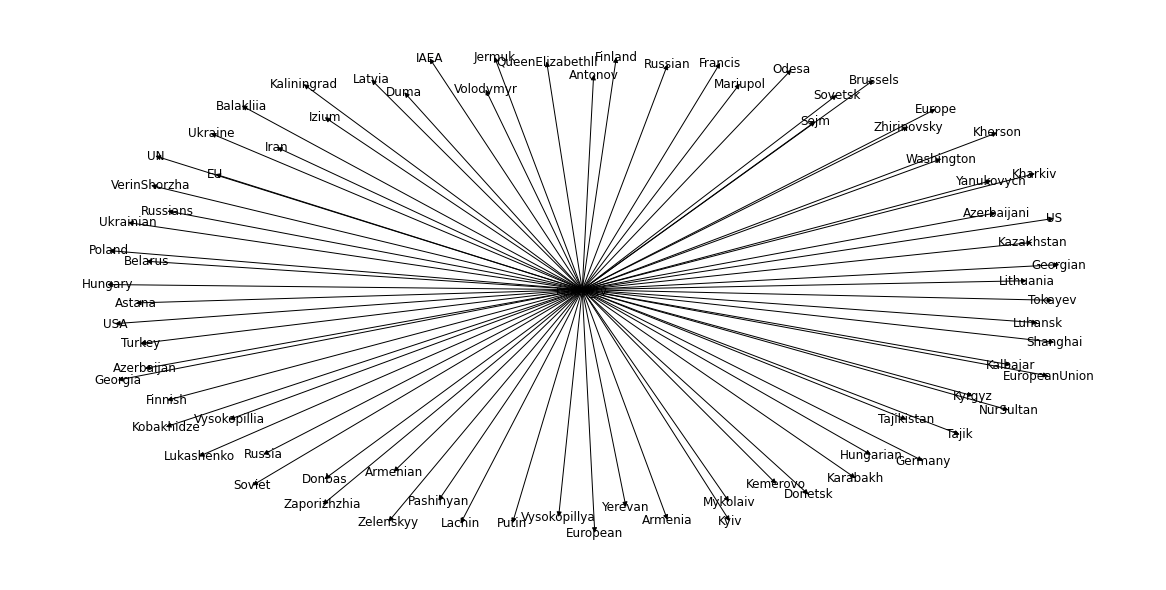

In [ ]:
G = nx.DiGraph()
for r in df.iterrows():
    for user in r[1]['mentioned_topics']:
        G.add_edge(r[1]['author'], user)

plt.figure(figsize=(16, 8))
nx.draw(G, with_labels=True, node_size=0.0001)
plt.show()

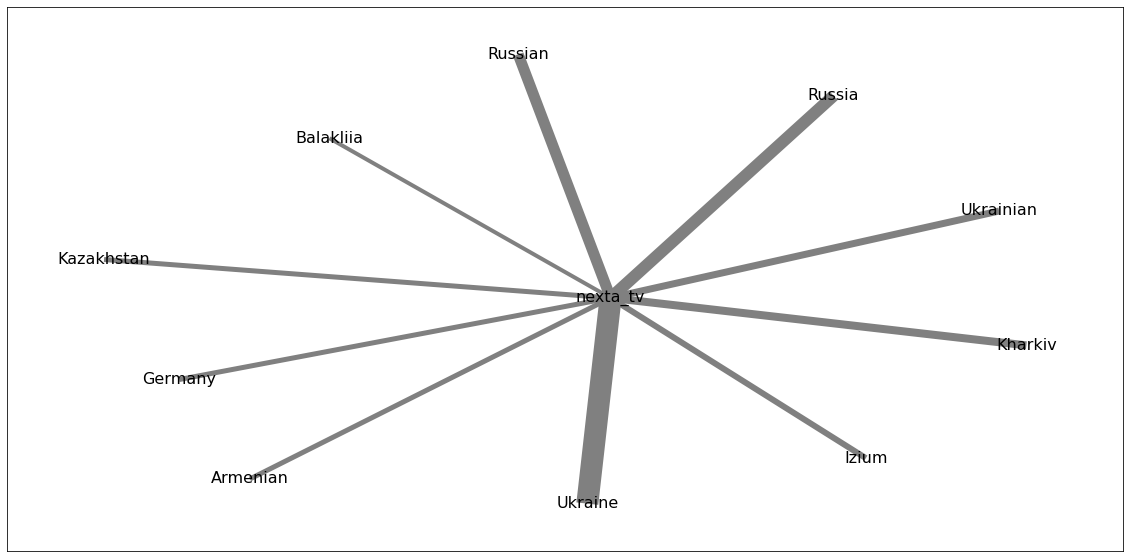

In [ ]:
list_of_hashtags = [element for sublist in df.mentioned_topics.to_list() for element in sublist]
frequencies_of_topics = Counter(list_of_hashtags).most_common(10)

G = nx.DiGraph()
for topic, weight in frequencies_of_topics:
  G.add_edge(nickname, topic, weight=weight)

plt.figure(figsize=(20, 10))
nx.draw_networkx(G, width=[d['weight'] for _, _, d in G.edges(data=True)], arrows=False, 
                 node_size=0.0001, edge_color='grey', font_size= 16)
plt.show()

#### Sentiment analysis

In [ ]:
sentiment_word = 'russia'
tweets = tweepy.Cursor(api.search, q=sentiment_word, lang="en").items(1000)

df = pd.DataFrame([tweet.text for tweet in tweets], columns=['tweets'])
df.head()

In [10]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9:]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity_textblob(text):
    return TextBlob(text).sentiment.polarity

vader_sentiment = SentimentIntensityAnalyzer()
def get_polarity_vader(text):
    return vader_sentiment.polarity_scores(text)['compound']

def get_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['tweets'] = df['tweets'].apply(clean_text)
df['subjectivity_textblob'] =  df['tweets'].apply(get_subjectivity)
df['polarity_textblob'] =  df['tweets'].apply(get_polarity_textblob)
df['polarity_vader'] =  df['tweets'].apply(get_polarity_vader)
df['sentiment_textblob'] = df['polarity_textblob'].apply(get_sentiment)
df['sentiment_vader'] = df['polarity_vader'].apply(get_sentiment)

df.head()

,tweets,subjectivity,polarity_textblob,polarity_vader,subjectivity_textblob,sentiment_textblob,sentiment_vader
0,eth merge roundup:\n1)Majority of eth staked w...,0.500000,0.062500,0.0000,0.500000,Positive,Neutral
1,Please Btc maxi's understand that you have no ...,0.375000,0.062500,0.3182,0.375000,Positive,Positive
2,Today has been a very long day from the momen...,0.572500,0.217500,0.4019,0.572500,Positive,Positive
3,The internet operates mostly on IP (bitcoin)...,0.500000,0.500000,0.3612,0.500000,Positive,Positive
4,Every strong progect is backed by an equally s...,0.766667,0.433333,0.8442,0.766667,Positive,Positive


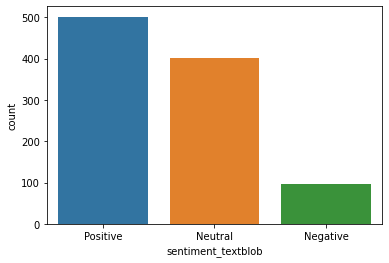

In [15]:
sns.countplot(x='sentiment_textblob', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.show()

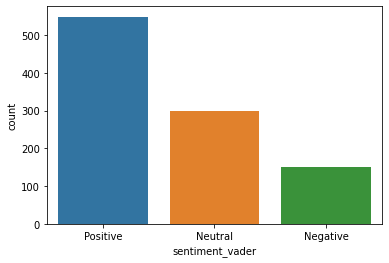

In [14]:
sns.countplot(x='sentiment_vader', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.show()